In [1]:
import os
import sys

project_directory = os.path.abspath('..')
sys.path.append(project_directory)

In [2]:
import torch
import torch.nn as nn
from src.utils.plotting import plot_history
from src.utils.common import set_seed, DEVICE
from src.dataloaders.dataloader import create_dataloaders
from src.models.modern_cnn_v1 import ModernCNNv1
from src.train.engine import train_one_epoch, eval_one_epoch
from src.train.trainer import EarlyStopper, fit
from torch.optim.lr_scheduler import CosineAnnealingLR
set_seed(42)

In [3]:
train_loader, val_loader, test_loader = create_dataloaders(data_root='../data')

In [4]:
model_v1 = ModernCNNv1()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v1.parameters(), lr=1e-4)
early_stoper = EarlyStopper()
epochs = 20

scheduler_cosine = CosineAnnealingLR(
    optimizer=optimizer,
    T_max=epochs,
    eta_min=1e-6
)

##### result_v1: No Erly Stopper, No Scheduler

In [10]:
result_v1 = fit(
    model=model_v1,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=DEVICE,
    epochs=epochs,
    early_stopper=None,
    scheduler=None
)

c:\Users\Engineer\AppData\Local\Programs\cv_env\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


EPOCH 1/20 | Train Loss: 1.607835 Acc: 0.407444 | Val Loss: 1.278845 Acc: 0.540000 
EPOCH 2/20 | Train Loss: 1.237691 Acc: 0.549867 | Val Loss: 1.061722 Acc: 0.613400 
EPOCH 3/20 | Train Loss: 1.059599 Acc: 0.622378 | Val Loss: 0.897415 Acc: 0.679000 
EPOCH 4/20 | Train Loss: 0.954884 Acc: 0.662022 | Val Loss: 0.827369 Acc: 0.706600 
EPOCH 5/20 | Train Loss: 0.879217 Acc: 0.690533 | Val Loss: 0.777931 Acc: 0.727600 
EPOCH 6/20 | Train Loss: 0.818962 Acc: 0.711556 | Val Loss: 0.755353 Acc: 0.737200 
EPOCH 7/20 | Train Loss: 0.775039 Acc: 0.729756 | Val Loss: 0.661283 Acc: 0.769200 
EPOCH 8/20 | Train Loss: 0.733986 Acc: 0.745467 | Val Loss: 0.700683 Acc: 0.755400 
EPOCH 9/20 | Train Loss: 0.705395 Acc: 0.755422 | Val Loss: 0.647289 Acc: 0.770200 
EPOCH 10/20 | Train Loss: 0.677676 Acc: 0.765978 | Val Loss: 0.600474 Acc: 0.788800 
EPOCH 11/20 | Train Loss: 0.653701 Acc: 0.773933 | Val Loss: 0.617777 Acc: 0.782600 
EPOCH 12/20 | Train Loss: 0.630327 Acc: 0.782244 | Val Loss: 0.591921 Acc:

In [11]:
result_v1

{'train_loss': [1.607834597990248,
  1.2376905620786878,
  1.0595985591464572,
  0.954883732287089,
  0.8792172717200385,
  0.8189618447197808,
  0.775039478831821,
  0.7339857007821401,
  0.7053951960987515,
  0.6776759561962552,
  0.6537005964491103,
  0.6303270817650689,
  0.613121835676829,
  0.5914247938262092,
  0.5779536200099521,
  0.558557696141137,
  0.541380642244551,
  0.5331514981587728,
  0.5209323151429495,
  0.5120297796938155],
 'val_loss': [1.2788446111679077,
  1.061721781539917,
  0.8974153900146484,
  0.8273692088127136,
  0.7779306255340576,
  0.7553528246879577,
  0.6612825536251068,
  0.7006834064483642,
  0.6472886456489563,
  0.6004739373207092,
  0.617777175617218,
  0.5919214289188385,
  0.5611980191230774,
  0.5798642006874084,
  0.5279632343769074,
  0.53900612449646,
  0.5425733833312988,
  0.5275360617160797,
  0.5155084989547729,
  0.48846076574325564],
 'train_acc': [0.40744444444444444,
  0.5498666666666666,
  0.6223777777777778,
  0.6620222222222222,

In [12]:
config = {
    "run_name": "run_001_baseline",
    "model": {
        "name": "ModernCNNv1"
    },
    "seed": 42,
    "dataset": {
        "name": "CIFAR-10",
        "num_classes": 10
    },
    "training": {
        "epochs": epochs,
        "batch_size": train_loader.batch_size,
        "device": str(DEVICE)
    },
    "optimizer": {
        "name": "Adam",
        "lr": 0.001,
        "weight_decay": 0.0
    },
    "scheduler": None,
    "early_stopping": None
}


In [13]:
config

{'run_name': 'run_001_baseline',
 'model': {'name': 'ModernCNNv1'},
 'seed': 42,
 'dataset': {'name': 'CIFAR-10', 'num_classes': 10},
 'training': {'epochs': 20, 'batch_size': 64, 'device': 'cpu'},
 'optimizer': {'name': 'Adam', 'lr': 0.001, 'weight_decay': 0.0},
 'scheduler': None,
 'early_stopping': None}

In [5]:
import json
from pathlib import Path

In [18]:
run_dir = Path("../runs/run_001_baseline")
run_dir.mkdir(parents=True, exist_ok=True)

# Save config.json
config_path = run_dir / "config.json"
with open(config_path, "w") as f:
    json.dump(config, f, indent=2)

print(f"Saved config to {config_path}")


Saved config to ..\runs\run_001_baseline\config.json


In [19]:
history = result_v1

# Save history.json
history_path = run_dir / "history.json"
with open(history_path, "w") as f:
    json.dump(history, f, indent=2)

print(f"Saved history to {history_path}")


Saved history to ..\runs\run_001_baseline\history.json


In [20]:
val_acc_curve = history["val_acc"]
val_loss_curve = history["val_loss"]

best_epoch = max(range(len(val_acc_curve)), key=lambda i: val_acc_curve[i])
best_val_acc = val_acc_curve[best_epoch]
best_val_loss = val_loss_curve[best_epoch]

metrics = {
    "num_epochs_ran": len(history["train_loss"]),
    "best_epoch": best_epoch + 1,  # human-friendly (1-based)
    "best_val_acc": best_val_acc,
    "best_val_loss": best_val_loss,
    "final_train_acc": history["train_acc"][-1],
    "final_val_acc": history["val_acc"][-1],
    "final_train_loss": history["train_loss"][-1],
    "final_val_loss": history["val_loss"][-1],
}

run_dir = Path("../runs/run_001_baseline")
metrics_path = run_dir / "metrics.json"
with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=2)

print(f"Saved metrics to {metrics_path}")
print(metrics)


Saved metrics to ..\runs\run_001_baseline\metrics.json
{'num_epochs_ran': 20, 'best_epoch': 20, 'best_val_acc': 0.8324, 'best_val_loss': 0.48846076574325564, 'final_train_acc': 0.8236, 'final_val_acc': 0.8324, 'final_train_loss': 0.5120297796938155, 'final_val_loss': 0.48846076574325564}


In [21]:
best_model_path = run_dir / "best.pt"
torch.save(model_v1.state_dict(), best_model_path)
print(f"Saved best model to {best_model_path}")

Saved best model to ..\runs\run_001_baseline\best.pt


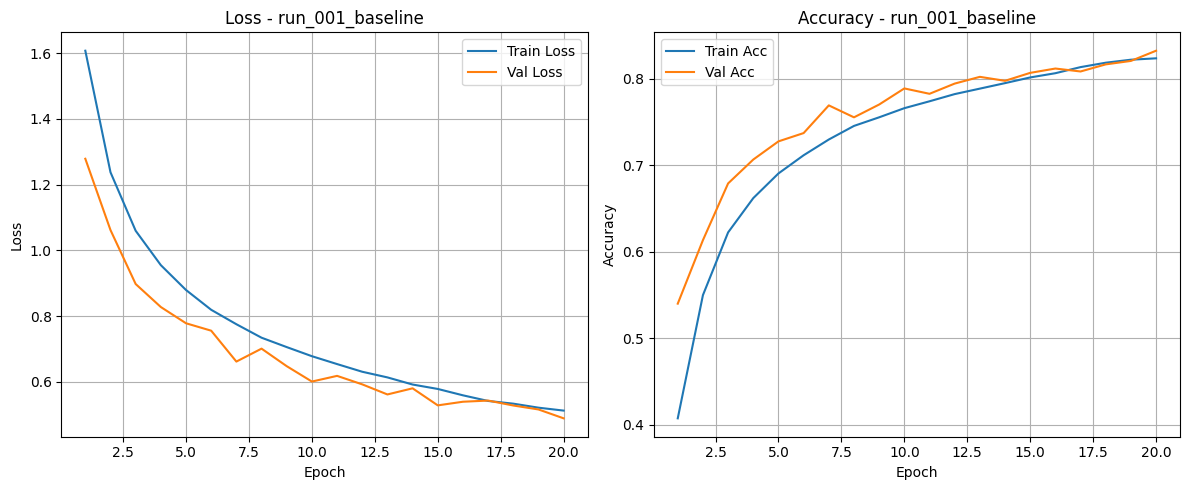

Saved plot to reports\figures\run_001_baseline_training_curves.png


In [7]:
import json

with open("../runs/run_001_baseline/history.json") as f:
    history = json.load(f)

plot_history(
    history,
    run_name="run_001_baseline"
)
